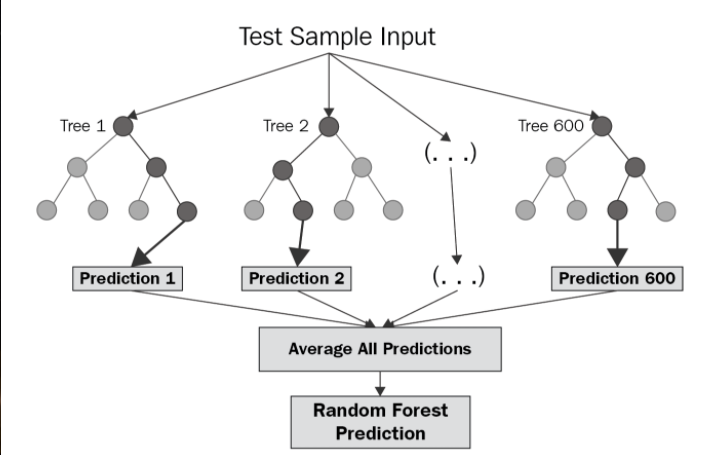
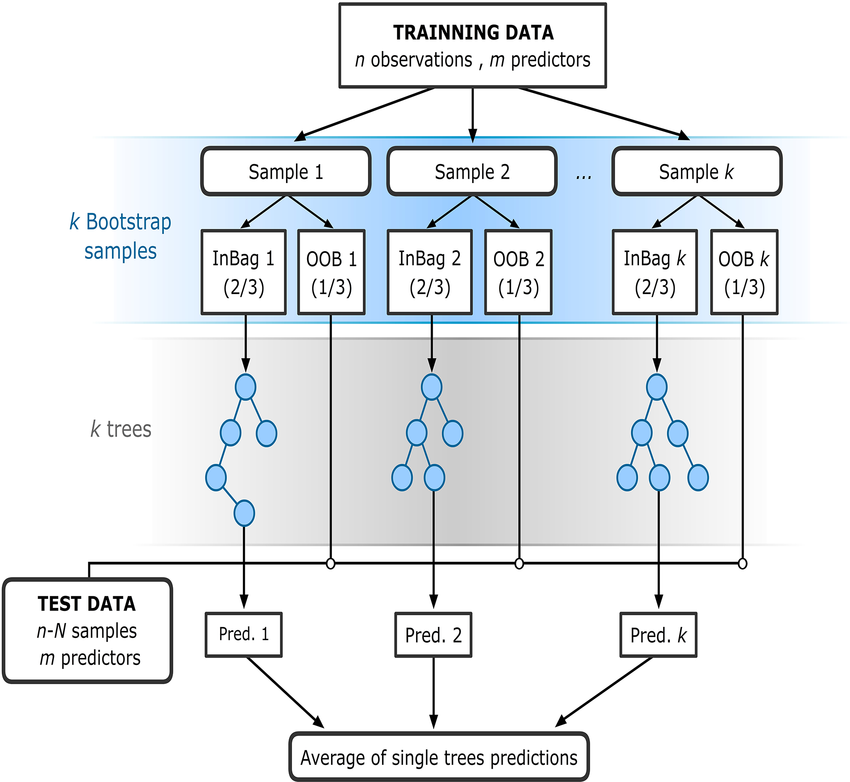

### 1. Importing libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

### 2. Preprocessing

In [7]:
dataset = pd.read_csv("Position_Salaries.csv")

description = dataset.describe()
print(f"Description: \n{description}\n")

X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

print(f"X: \n{X}\n")
print(f"y: \n{y}\n")

Description: 
          Level          Salary
count  10.00000       10.000000
mean    5.50000   249500.000000
std     3.02765   299373.883668
min     1.00000    45000.000000
25%     3.25000    65000.000000
50%     5.50000   130000.000000
75%     7.75000   275000.000000
max    10.00000  1000000.000000

X: 
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

y: 
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]



### 3. Fitting the Random Forest Regression Model

In [8]:
random_forest_regression_model = RandomForestRegressor(n_estimators=10, random_state=0)
random_forest_regression_model.fit(X, y)

y_predicted = random_forest_regression_model.predict(X)

print(y_predicted)

MSE = mean_squared_error(y_true = y, y_pred = y_predicted)
MAE = mean_absolute_error(y_true = y, y_pred = y_predicted)
R2 = r2_score(y_true = y, y_pred = y_predicted)

print(f"MSE: {MSE}")
print(f"MAE: {MAE}")
print(f"R2: {R2}")

prediction = random_forest_regression_model.predict(
    [
        [5],
        [6.5],
        [7],
        [8],
        [9],
        [10]
    ]
)

print(f"Prediction: {prediction}")

[ 46000.  49000.  59000.  74000. 101000. 136000. 210000. 305000. 470000.
 850000.]
MSE: 2384100000.0
MAE: 22700.0
R2: 0.9704434230386582
Prediction: [101000. 167000. 210000. 305000. 470000. 850000.]


### 4. Visualising the Random Forest Regression results

C:\Users\PanCh\AppData\Local\Temp\ipykernel_9760\2239974328.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


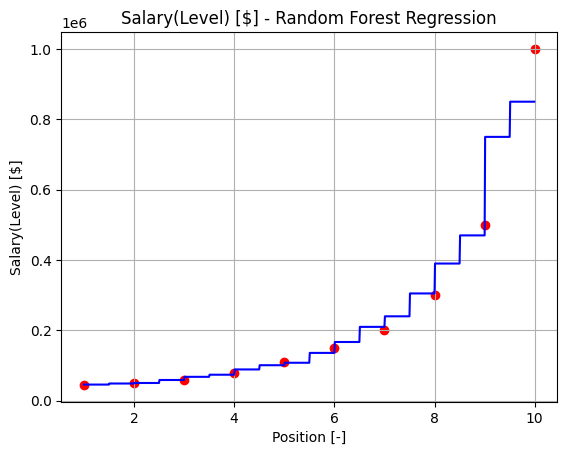

In [9]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = "red")
plt.plot(X_grid, random_forest_regression_model.predict(X_grid), color="blue")
plt.title("Salary(Level) [$] - Random Forest Regression")
plt.ylabel("Salary(Level) [$]")
plt.xlabel("Position [-]")
plt.grid(True)
plt.savefig("random_forest_regression.jpg")
plt.show()